In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data=pd.read_excel("C:\\Users\\HP\\OneDrive\\Desktop\\datascience\\Clustering\\Clustering\\EastWestAirlines.xlsx",sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# data preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data.shape

(3999, 12)

In [5]:
df=data.iloc[:,1:]
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
des=data.describe()
des


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# finding outliers and removing 

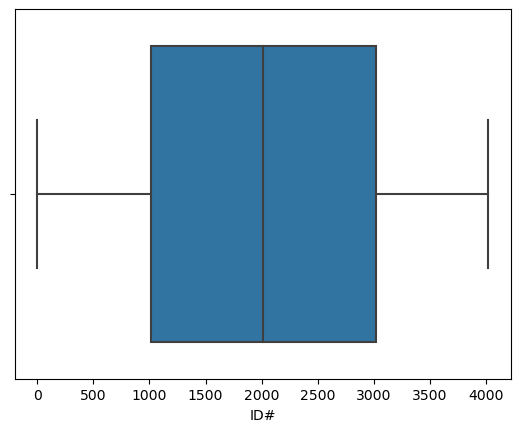

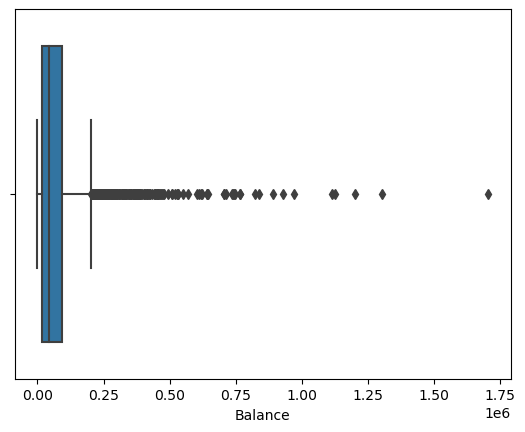

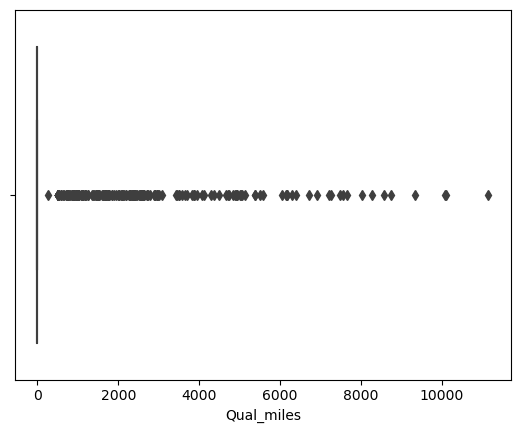

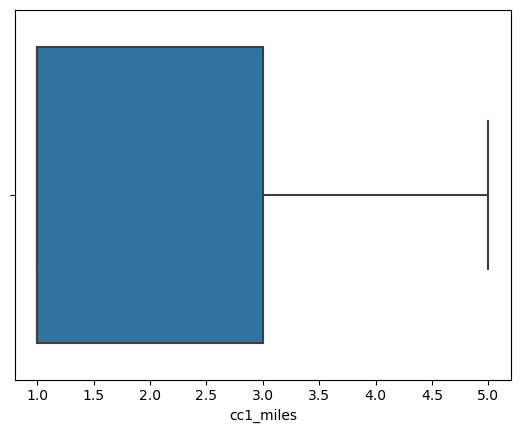

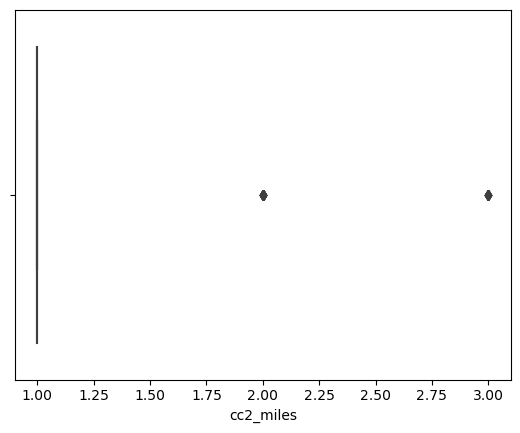

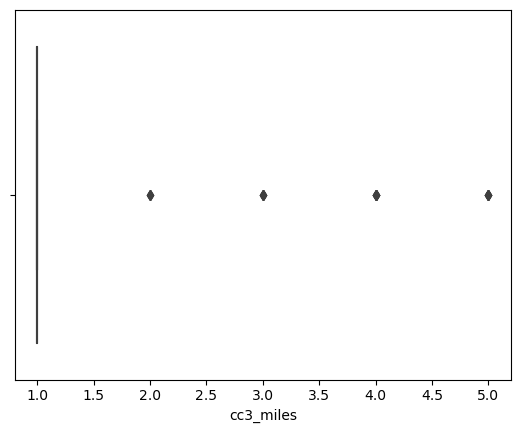

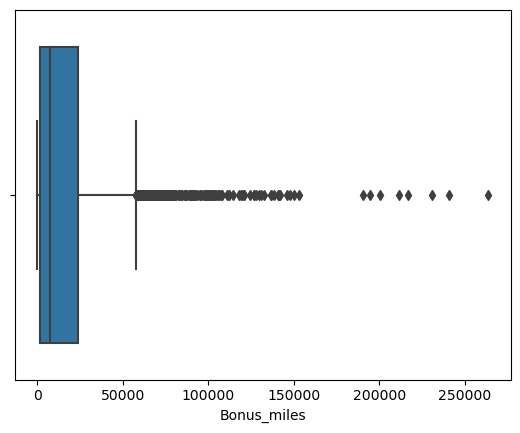

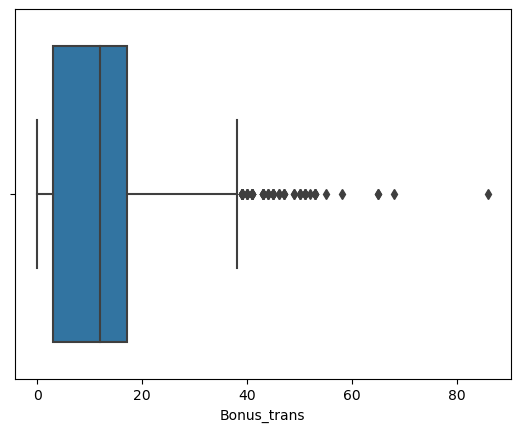

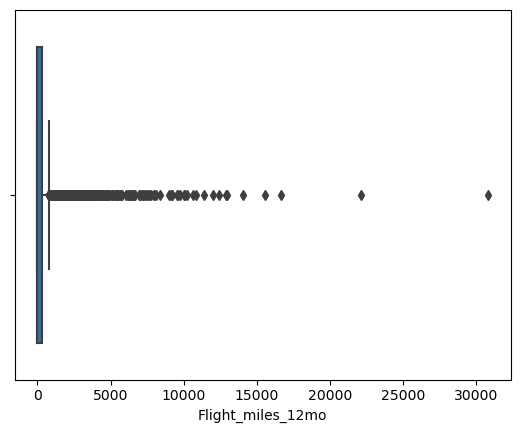

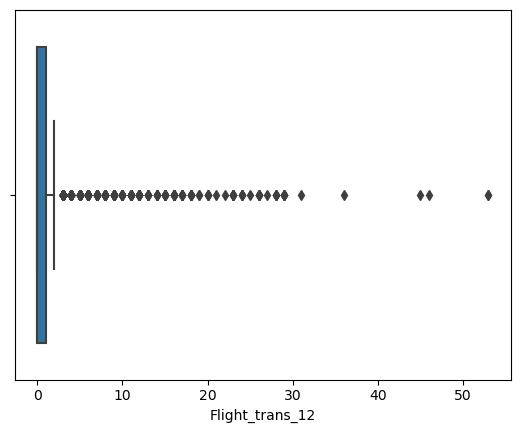

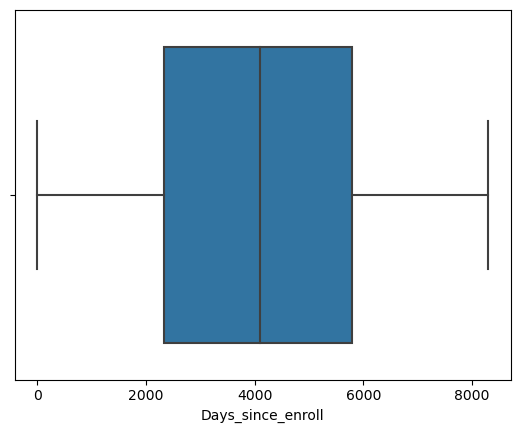

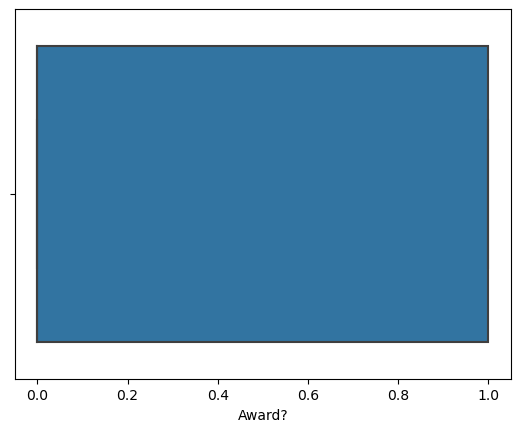

In [7]:
for i in data:
    sns.boxplot(data=data,x=i)
    plt.show()

In [8]:
for i in ['Balance', 'Qual_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 
            'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12']:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    IQR=q1-q3
    upperlimit=q3+1.5*IQR
    lowerlimit=q1-1.5*IQR
    print(f'columnname:{i}')
    print(f'25th quantile:{q1}')
    print(f'75th quantile:{q3}')
    print(f'IQR:{IQR}')
    print(f'upperlimit:{upperlimit}')
    print(f'lowerlimit:{lowerlimit}')
    print("-" * 40)
    

columnname:Balance
25th quantile:18527.5
75th quantile:92404.0
IQR:-73876.5
upperlimit:-18410.75
lowerlimit:129342.25
----------------------------------------
columnname:Qual_miles
25th quantile:0.0
75th quantile:0.0
IQR:0.0
upperlimit:0.0
lowerlimit:0.0
----------------------------------------
columnname:cc2_miles
25th quantile:1.0
75th quantile:1.0
IQR:0.0
upperlimit:1.0
lowerlimit:1.0
----------------------------------------
columnname:cc3_miles
25th quantile:1.0
75th quantile:1.0
IQR:0.0
upperlimit:1.0
lowerlimit:1.0
----------------------------------------
columnname:Bonus_miles
25th quantile:1250.0
75th quantile:23800.5
IQR:-22550.5
upperlimit:-10025.25
lowerlimit:35075.75
----------------------------------------
columnname:Bonus_trans
25th quantile:3.0
75th quantile:17.0
IQR:-14.0
upperlimit:-4.0
lowerlimit:24.0
----------------------------------------
columnname:Flight_miles_12mo
25th quantile:0.0
75th quantile:311.0
IQR:-311.0
upperlimit:-155.5
lowerlimit:466.5
---------------

In [9]:
#printing outliers
outliers = data[(data[i] < lowerlimit) | (data[i] > upperlimit)]
outliers

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [10]:
#printing data removing outliers
no_outliers=data[(data[i]>=lowerlimit)&(data[i]<=upperlimit)]
no_outliers

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


 # normalising the data 

In [11]:
from sklearn.preprocessing import MinMaxScaler 
scaling=MinMaxScaler()
data_norm=scaling.fit_transform(df)
data_norm


array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

# fitting to  model

In [12]:
modelk=KMeans(n_clusters=5).fit(data_norm)
modelk.inertia_

409.84198454709787

In [13]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


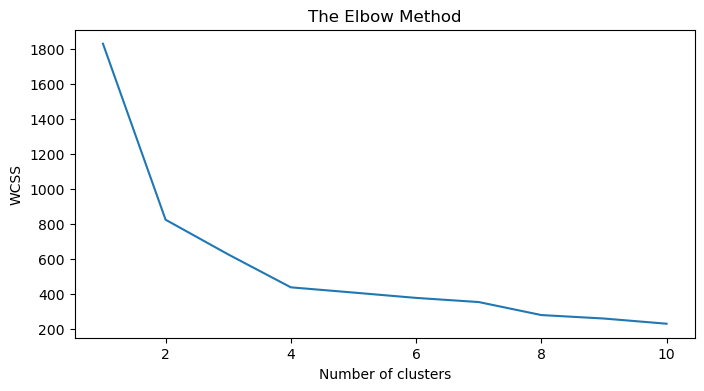

In [14]:

fig=plt.figure(figsize=(8,4))
WCSS=[]
for i in range(1,11):
    model=KMeans(n_clusters=i).fit(data_norm)
    WCSS.append(model.inertia_)
plt.plot(range(1,11),WCSS)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")

plt.ylabel("WCSS")
plt.show()


The point where the curve bends, indicating diminishing returns in reducing within-cluster variance, is considered the optimal 
𝑘


In [15]:
kmeans=KMeans(n_clusters=2).fit(data_norm)
kmeans.inertia_


823.6756984125207

In [16]:
cluster_names=kmeans.predict(data_norm) # predicting the cluster values
cluster_names

array([0, 0, 0, ..., 1, 0, 0])

In [17]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [18]:
centers=pd.DataFrame(kmeans.cluster_centers_)
centers

,0,1,2,3,4,5,6,7,8,9,10
0,0.035081,0.007858,0.176330,0.006950,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,5.495604e-15
1,0.056928,0.021546,0.415429,0.007765,0.004558,0.109621,0.183518,0.027826,0.049049,0.557398,1.000000e+00


In [19]:
data_norm = pd.DataFrame(data_norm)  # converting the  normalization  data into dataframe
clustnames=pd.DataFrame(kmeans.labels_,columns=['clust']) # converting the clusters values into series
clustnames

,clust
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [20]:
cluster_data=pd.concat([data,clustnames],axis=1) # concating the labels to data
cluster_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [21]:
# analyzing the cluster - gives the how many patterns going to be formed 
cluster_summary=cluster_data.iloc[:,1:].groupby('clust').mean()
cluster_summary

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,
0,59807.839555,87.602462,1.705322,1.01390,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
1,97053.051317,240.196489,2.661715,1.01553,1.018231,28905.414585,15.782579,857.501013,2.599595,4625.062120,1.0


# Visualization:

<AxesSubplot:xlabel='Balance', ylabel='Qual_miles'>

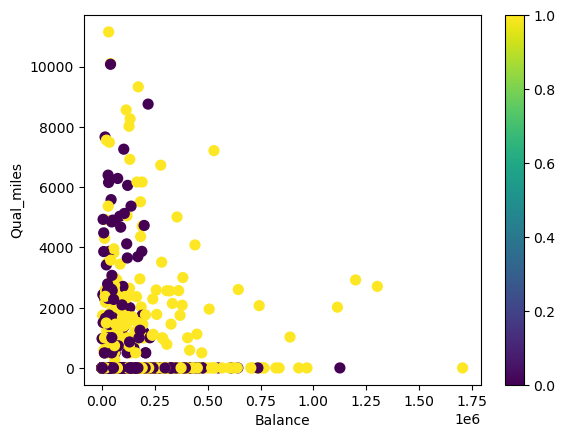

In [22]:
# visualizing the data
data.plot('Balance','Qual_miles',c=kmeans.labels_,kind='scatter',s=50,cmap='viridis')


# Evaluation and Performance Metrics:

 # Silhouette Score helps evaluate the quality of clustering after clustering method

In [23]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data_norm,kmeans.labels_)
print(score)


0.535930510919477


 # Using NearestNeighbors to find the nearest neighbors of each point in a dataset:

In [24]:
from sklearn.neighbors import NearestNeighbors
neigh= NearestNeighbors(n_neighbors=12).fit(data_norm)
distances,indices=neigh.kneighbors(data_norm)
print(f'neighbors:{neigh}')
print(f'distance:{distances}')
print(f'indices:{indices}')

neighbors:NearestNeighbors(n_neighbors=12)
distance:[[0.         0.00871531 0.00982329 ... 0.0190791  0.02126834 0.02209439]
 [0.         0.01212297 0.01331785 ... 0.02353866 0.02424792 0.02439492]
 [0.         0.01857767 0.01872551 ... 0.03660932 0.03693779 0.03716255]
 ...
 [0.         0.02591961 0.04945468 ... 0.09422899 0.0968884  0.10183487]
 [0.         0.0264501  0.02784951 ... 0.03464224 0.03555204 0.03623787]
 [0.         0.00038605 0.0027753  ... 0.01282535 0.01402924 0.01527531]]
indices:[[   0  363    3 ...  358   54  316]
 [   1    3    0 ...    5   14  367]
 [   2  338  344 ...   55   83   98]
 ...
 [3996 3877 3830 ... 3263 3624 3973]
 [3997 3970 3968 ... 3940 3368 3964]
 [3998 3491 3455 ... 3591 3374 3481]]


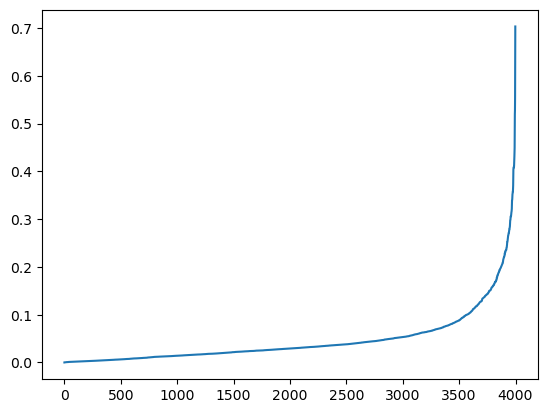

In [25]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

# hierarchy clustering 

In [26]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage,dendrogram
# Performing hierarchical clustering using the 'ward' method
Z = linkage(df, method='ward')
Z

array([[3.37000000e+03, 3.87600000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.56500000e+03, 3.58100000e+03, 2.00000000e+01, 2.00000000e+00],
       [3.82700000e+03, 3.84500000e+03, 2.10237960e+01, 2.00000000e+00],
       ...,
       [7.99000000e+03, 7.99100000e+03, 2.92679746e+06, 7.58000000e+02],
       [7.99200000e+03, 7.99400000e+03, 4.59400396e+06, 7.84000000e+02],
       [7.99300000e+03, 7.99500000e+03, 6.30359626e+06, 3.99900000e+03]])

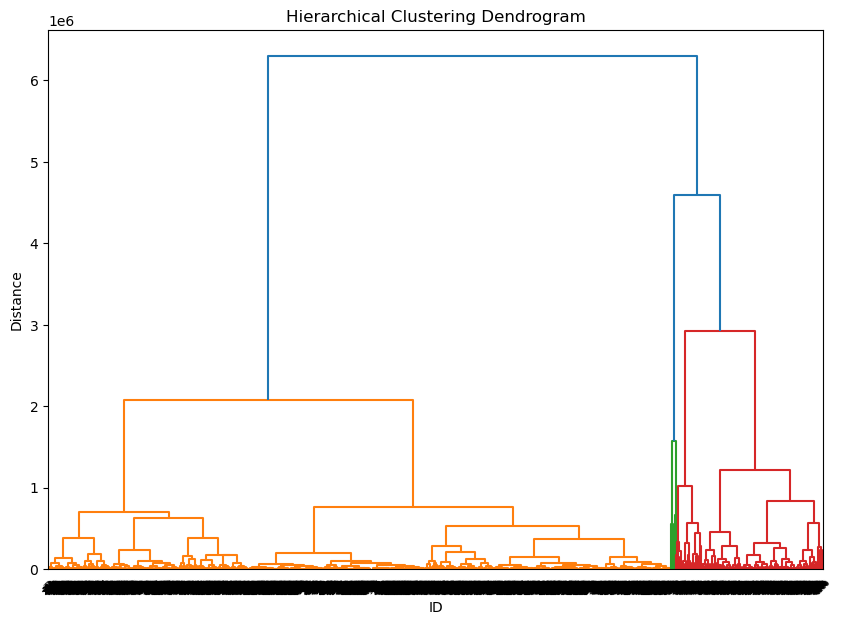

In [27]:
# Plotting the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data['ID#'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('ID')
plt.xticks(rotation=45)
plt.ylabel('Distance')
plt.show()

 # DBSCAN cluster- density based spaital clustering of application with noise


In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

In [29]:
data1=pd.read_excel("C:\\Users\\HP\\OneDrive\\Desktop\\datascience\\Clustering\\Clustering\\EastWestAirlines.xlsx",sheet_name='data')
data1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [30]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [31]:
# normalising the data
data1_norm=MinMaxScaler().fit_transform(data1)
data1_norm

array([[0.00000000e+00, 1.65077268e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.43742464e-01, 0.00000000e+00],
       [2.48756219e-04, 1.12878760e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.39884254e-01, 0.00000000e+00],
       [4.97512438e-04, 2.42568502e-02, 0.00000000e+00, ...,
        0.00000000e+00, 8.47841813e-01, 0.00000000e+00],
       ...,
       [9.99502488e-01, 4.31694976e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.68796721e-01, 1.00000000e+00],
       [9.99751244e-01, 3.22018866e-02, 0.00000000e+00, ...,
        1.88679245e-02, 1.68676151e-01, 0.00000000e+00],
       [1.00000000e+00, 1.76908304e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.68314444e-01, 0.00000000e+00]])

In [32]:
# coverting into dataframe 
df=pd.DataFrame(data1_norm)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [33]:
#fitting into model
DB_model=DBSCAN(eps=0.8,min_samples=10).fit(data1_norm)
DB_model

DBSCAN(eps=0.8, min_samples=10)

In [34]:
 # gives clusters names

In [35]:
# converting labels to dataframe
label_df=pd.DataFrame(DB_model.labels_,columns=['cluster'])
label_df

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [36]:
# adding cluster column to dataframe
pd.concat([data1,label_df],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


<AxesSubplot:xlabel='Balance', ylabel='Qual_miles'>

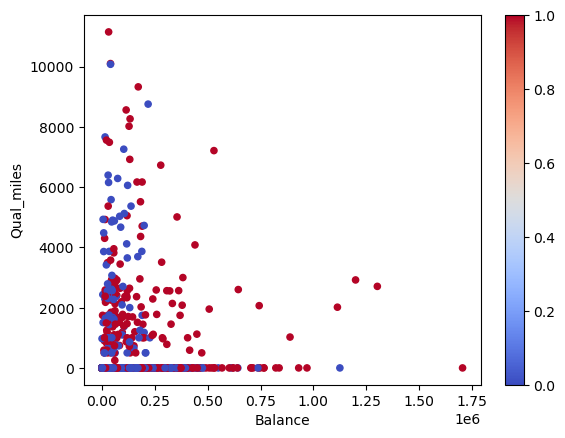

In [37]:
data1.plot(x="Balance",y="Qual_miles",c=DB_model.labels_,kind="scatter",cmap="coolwarm")

# Silhouette Score helps evaluate the quality of clustering after DBSCAN (or any other clustering method).

ranges from -1 to 1

1: The point is far away from the neighboring clusters and close to the points in its own cluster.

0: The point is on or very close to the decision boundary between two clusters.

-1: The point may have been assigned to the wrong cluster.

In [38]:
from sklearn.metrics import silhouette_score
score = silhouette_score(data1_norm,DB_model.labels_)
print(score)


0.4701970394742716


 # Using NearestNeighbors to find the nearest neighbors of each point in a dataset:

In [39]:
from sklearn.neighbors import NearestNeighbors
neigh= NearestNeighbors(n_neighbors=12).fit(data1_norm)
distances,indices=neigh.kneighbors(data1_norm)
print(f'neighbors:{neigh}')
print(f'distance:{distances}')
print(f'indices:{indices}')

neighbors:NearestNeighbors(n_neighbors=12)
distance:[[0.         0.00985159 0.01332017 ... 0.04166214 0.04168353 0.04230063]
 [0.         0.01213317 0.01332017 ... 0.0423991  0.04291737 0.04451844]
 [0.         0.02749064 0.03149707 ... 0.05008956 0.05020542 0.05031999]
 ...
 [0.         0.03934595 0.06442764 ... 0.12755323 0.13397954 0.14220619]
 [0.         0.02728952 0.02876866 ... 0.04023033 0.04031448 0.04104138]
 [0.         0.00532478 0.00744407 ... 0.02895877 0.02934265 0.03054186]]
indices:[[   0    3    1 ...   64  102  104]
 [   1    3    0 ...   64   98  102]
 [   2   13    1 ...   84   51   66]
 ...
 [3996 3877 3830 ... 3913 3624 3688]
 [3997 3970 3968 ... 3971 3882 3998]
 [3998 3981 3975 ... 3912 3910 3990]]


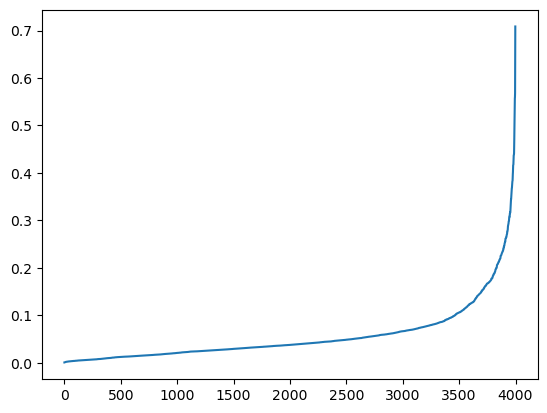

In [40]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)